# Let's learn about lazy predict and
## We now have our data in place, we know what works,
## Let's see how can we bring down our modelling time using Lazy Predict

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
!pip3 install numpy==1.19.2

In [1]:
! pip3 install pandas==1.1.0

In [2]:
!pip install imgaug==0.2.5

     |████████████████████████████████| 563kB 7.7MB/s 
  Created wheel for imgaug: filename=imgaug-0.2.5-cp37-none-any.whl size=561439 sha256=e739be80de1ca5616ba39f9c335d070828741bb10d004ce6a19e2b3ac1ce71f5
  Stored in directory: /root/.cache/pip/wheels/31/48/c8/ca3345e8582a078de94243996e148377ef66fdb845557bae0b
Successfully built imgaug
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9


In [1]:
#install the necessary libraries
! pip install lazypredict

In [2]:
# import libraries
import warnings
warnings.filterwarnings('ignore')
from lazypredict.Supervised import LazyRegressor
from lazypredict.Supervised import LazyClassifier
from sklearn.datasets import fetch_california_housing,load_boston, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn import datasets
import statsmodels.formula.api as sm
from sklearn.utils import shuffle
import lazypredict
from seaborn import pairplot
import time
import numpy as np
import pandas as pd

## First Up : Classification 

In [3]:
# load data
data_c = load_breast_cancer()
X = data_c.data
y= data_c.target

In [4]:
df = pd.DataFrame(data_c.data, columns=data_c.feature_names)
df["target"] = data_c.target

In [5]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.00,0.12,0.28,0.30,0.15,0.24,0.08,1.09,0.91,8.59,153.40,0.01,0.05,0.05,0.02,0.03,0.01,25.38,17.33,184.60,2019.00,0.16,0.67,0.71,0.27,0.46,0.12,0
1,20.57,17.77,132.90,1326.00,0.08,0.08,0.09,0.07,0.18,0.06,0.54,0.73,3.40,74.08,0.01,0.01,0.02,0.01,0.01,0.00,24.99,23.41,158.80,1956.00,0.12,0.19,0.24,0.19,0.28,0.09,0
2,19.69,21.25,130.00,1203.00,0.11,0.16,0.20,0.13,0.21,0.06,0.75,0.79,4.58,94.03,0.01,0.04,0.04,0.02,0.02,0.00,23.57,25.53,152.50,1709.00,0.14,0.42,0.45,0.24,0.36,0.09,0
3,11.42,20.38,77.58,386.10,0.14,0.28,0.24,0.11,0.26,0.10,0.50,1.16,3.44,27.23,0.01,0.07,0.06,0.02,0.06,0.01,14.91,26.50,98.87,567.70,0.21,0.87,0.69,0.26,0.66,0.17,0
4,20.29,14.34,135.10,1297.00,0.10,0.13,0.20,0.10,0.18,0.06,0.76,0.78,5.44,94.44,0.01,0.02,0.06,0.02,0.02,0.01,22.54,16.67,152.20,1575.00,0.14,0.20,0.40,0.16,0.24,0.08,0


## Let's do some EDA around it!

In [6]:
df.skew()

mean radius                0.94
mean texture               0.65
mean perimeter             0.99
mean area                  1.65
mean smoothness            0.46
mean compactness           1.19
mean concavity             1.40
mean concave points        1.17
mean symmetry              0.73
mean fractal dimension     1.30
radius error               3.09
texture error              1.65
perimeter error            3.44
area error                 5.45
smoothness error           2.31
compactness error          1.90
concavity error            5.11
concave points error       1.44
symmetry error             2.20
fractal dimension error    3.92
worst radius               1.10
worst texture              0.50
worst perimeter            1.13
worst area                 1.86
worst smoothness           0.42
worst compactness          1.47
worst concavity            1.15
worst concave points       0.49
worst symmetry             1.43
worst fractal dimension    1.66
target                    -0.53
dtype: f

The skew result show a positive (right) or negative (left) skew. Values closer to zero show less skew. From the graphs, we can see that mean radius, mean perimeter, mean area, mean concavity and mean concave points mean are useful in predicting cancer type due to the distinct grouping between malignant and benign cancer types in these features. We can also see that worst area and worst perimeter are also quite useful.

In [7]:
df.target.value_counts()


1    357
0    212
Name: target, dtype: int64

## Observation
- 357 observations indicating the absence of cancer cells and 212 show absence of cancer cell

### Lets confirm this, by ploting the histogram


## Now we understand the data - let's jump into modelling

In [9]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.2,random_state =123)

# initialise classifier object
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None, predictions=True)
# and let lazypredict do the work for you
start_time_1=time.time()
models_c,predictions_c = clf.fit(X_train, X_test, y_train, y_test)
end_time_1 = time.time()
print("\n\nThe time taken by LazyClassifier for {0} samples is {1} ms".format(len(df),round(end_time_1-start_time_1,0)))

100%|██████████| 29/29 [00:01<00:00, 18.06it/s]



The time taken by LazyClassifier for 569 samples is 2.0 ms


# Lets see which models performed well and which didint


In [10]:
models_c

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LinearSVC,0.99,0.99,0.99,0.99,0.04
ExtraTreesClassifier,0.99,0.99,0.99,0.99,0.16
SGDClassifier,0.99,0.99,0.99,0.99,0.03
RandomForestClassifier,0.99,0.99,0.99,0.99,0.30
QuadraticDiscriminantAnalysis,0.99,0.99,0.99,0.99,0.02
Perceptron,0.99,0.99,0.99,0.99,0.03
LogisticRegression,0.99,0.99,0.99,0.99,0.04
LGBMClassifier,0.98,0.98,0.98,0.98,0.15
PassiveAggressiveClassifier,0.98,0.98,0.98,0.98,0.02


In [11]:
predictions_c

,AdaBoostClassifier,BaggingClassifier,BernoulliNB,CalibratedClassifierCV,DecisionTreeClassifier,DummyClassifier,ExtraTreeClassifier,ExtraTreesClassifier,GaussianNB,KNeighborsClassifier,LabelPropagation,LabelSpreading,LinearDiscriminantAnalysis,LinearSVC,LogisticRegression,NearestCentroid,NuSVC,PassiveAggressiveClassifier,Perceptron,QuadraticDiscriminantAnalysis,RandomForestClassifier,RidgeClassifier,RidgeClassifierCV,SGDClassifier,SVC,XGBClassifier,LGBMClassifier
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
110,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
111,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
112,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


## We've seen classification, let's check out regression on california 

In [12]:
data_r=load_boston()
X1=data_r.data
Y1=data_r.target

In [13]:
df = pd.DataFrame(data_r.data, columns=data_r.feature_names)
df["price"] = data_r.target

In [14]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1.00,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2.00,242.00,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2.00,242.00,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0.00,0.46,7.00,45.80,6.06,3.00,222.00,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0.00,0.46,7.15,54.20,6.06,3.00,222.00,18.70,396.90,5.33,36.20


In [15]:
print(data_r.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [16]:
print(df.describe())

        CRIM     ZN  INDUS   CHAS    NOX  ...    TAX  PTRATIO      B  LSTAT  price
count 506.00 506.00 506.00 506.00 506.00  ... 506.00   506.00 506.00 506.00 506.00
mean    3.61  11.36  11.14   0.07   0.55  ... 408.24    18.46 356.67  12.65  22.53
std     8.60  23.32   6.86   0.25   0.12  ... 168.54     2.16  91.29   7.14   9.20
min     0.01   0.00   0.46   0.00   0.39  ... 187.00    12.60   0.32   1.73   5.00
25%     0.08   0.00   5.19   0.00   0.45  ... 279.00    17.40 375.38   6.95  17.02
50%     0.26   0.00   9.69   0.00   0.54  ... 330.00    19.05 391.44  11.36  21.20
75%     3.68  12.50  18.10   0.00   0.62  ... 666.00    20.20 396.23  16.96  25.00
max    88.98 100.00  27.74   1.00   0.87  ... 711.00    22.00 396.90  37.97  50.00

[8 rows x 14 columns]


## Taking a peek at the relationship between the predicting variables and the response

In [17]:
%matplotlib inline
from matplotlib import pyplot as plt

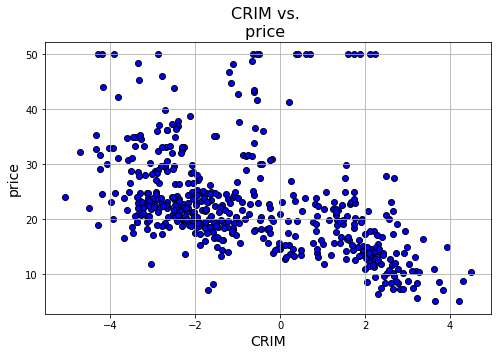

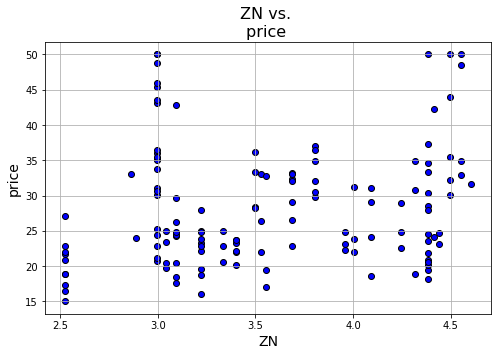

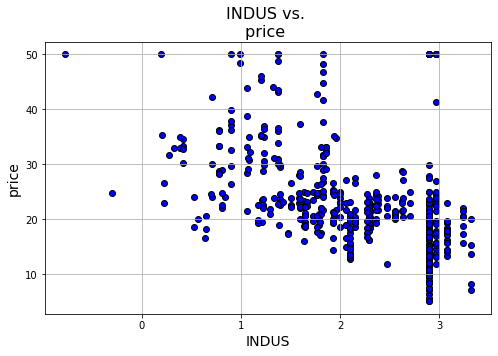

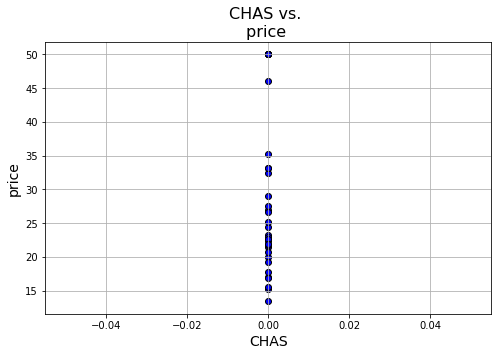

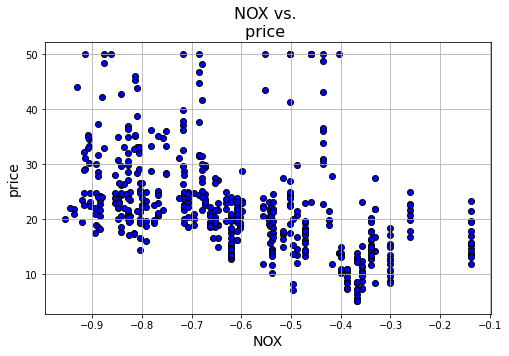

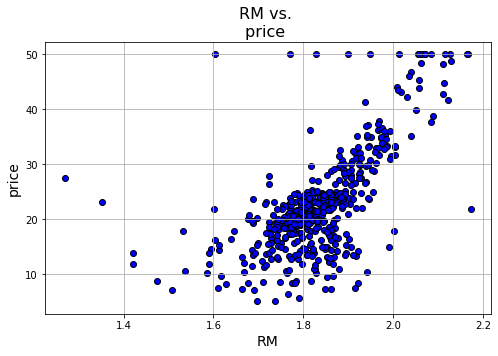

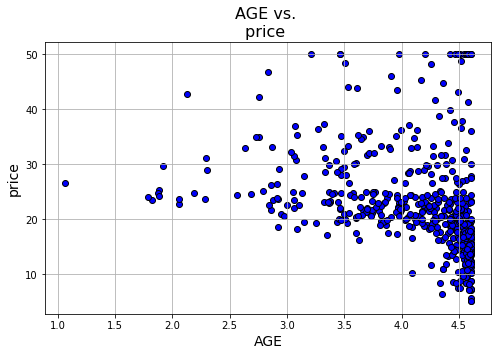

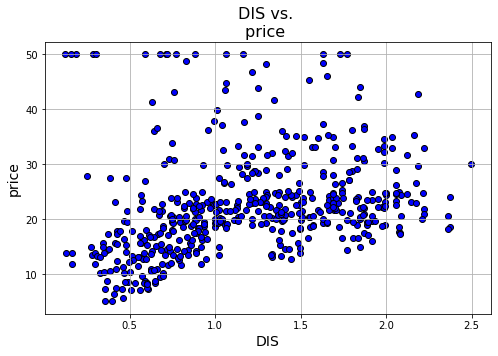

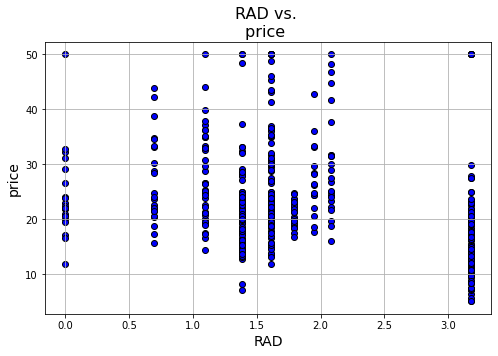

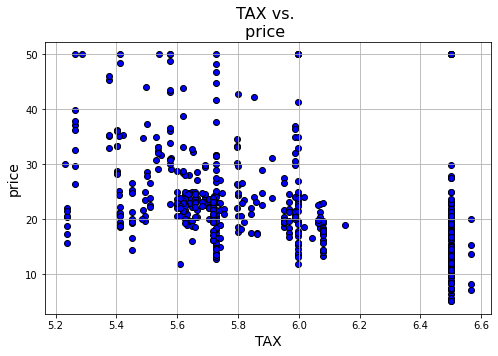

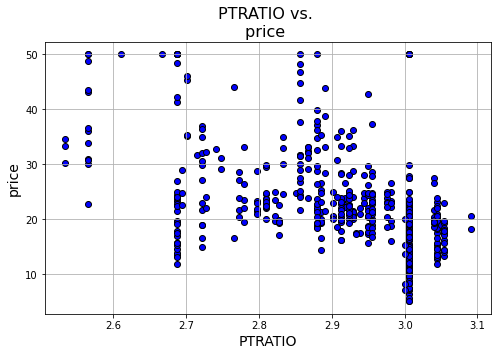

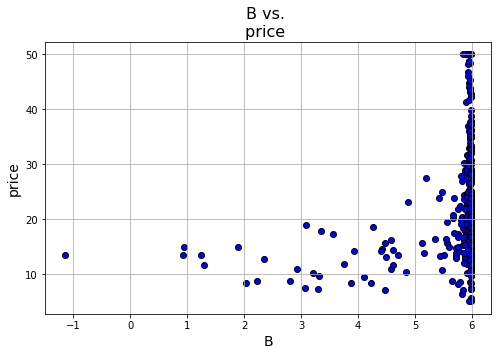

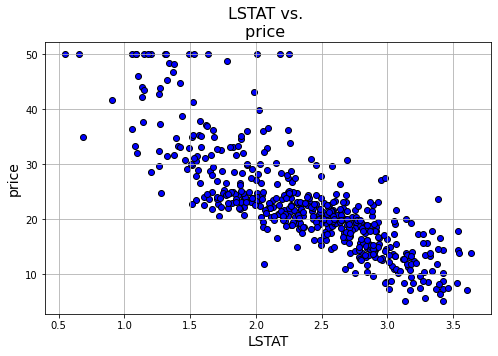

In [18]:
for c in df.columns[:-1]:
    plt.figure(figsize=(8,5))
    plt.title("{} vs. \nprice ".format(c),fontsize=16)
    plt.scatter(x=np.log(df[c]),y=df['price'],color='blue',edgecolor='k')
    plt.grid(True)
    plt.xlabel(c,fontsize=14)
    plt.ylabel('price',fontsize=14)
    plt.show()

### Data transformation, if y seems exponential to x how about plotting a curve between y and log(x) (or y vs x squared).

## Pairwise scatter plots: Checking multicollinearity

### When we are performing linear regression analysis we are looking for a solution of type y = mx + c, where c is intercept and m is the slope. The value of ‘m’ determines how much y would change while changing x by unity. For a multivariate linear regression same relationship holds for the following equation: y = m1x1 +m2x2 +m3x3 … + c. Ideally, m1 denotes how much y would change on changing x1 but what if a change in x1 changes x2 or x3. In such a case the relationship between y and m1 (or m2, m3, etc) would be very complex.

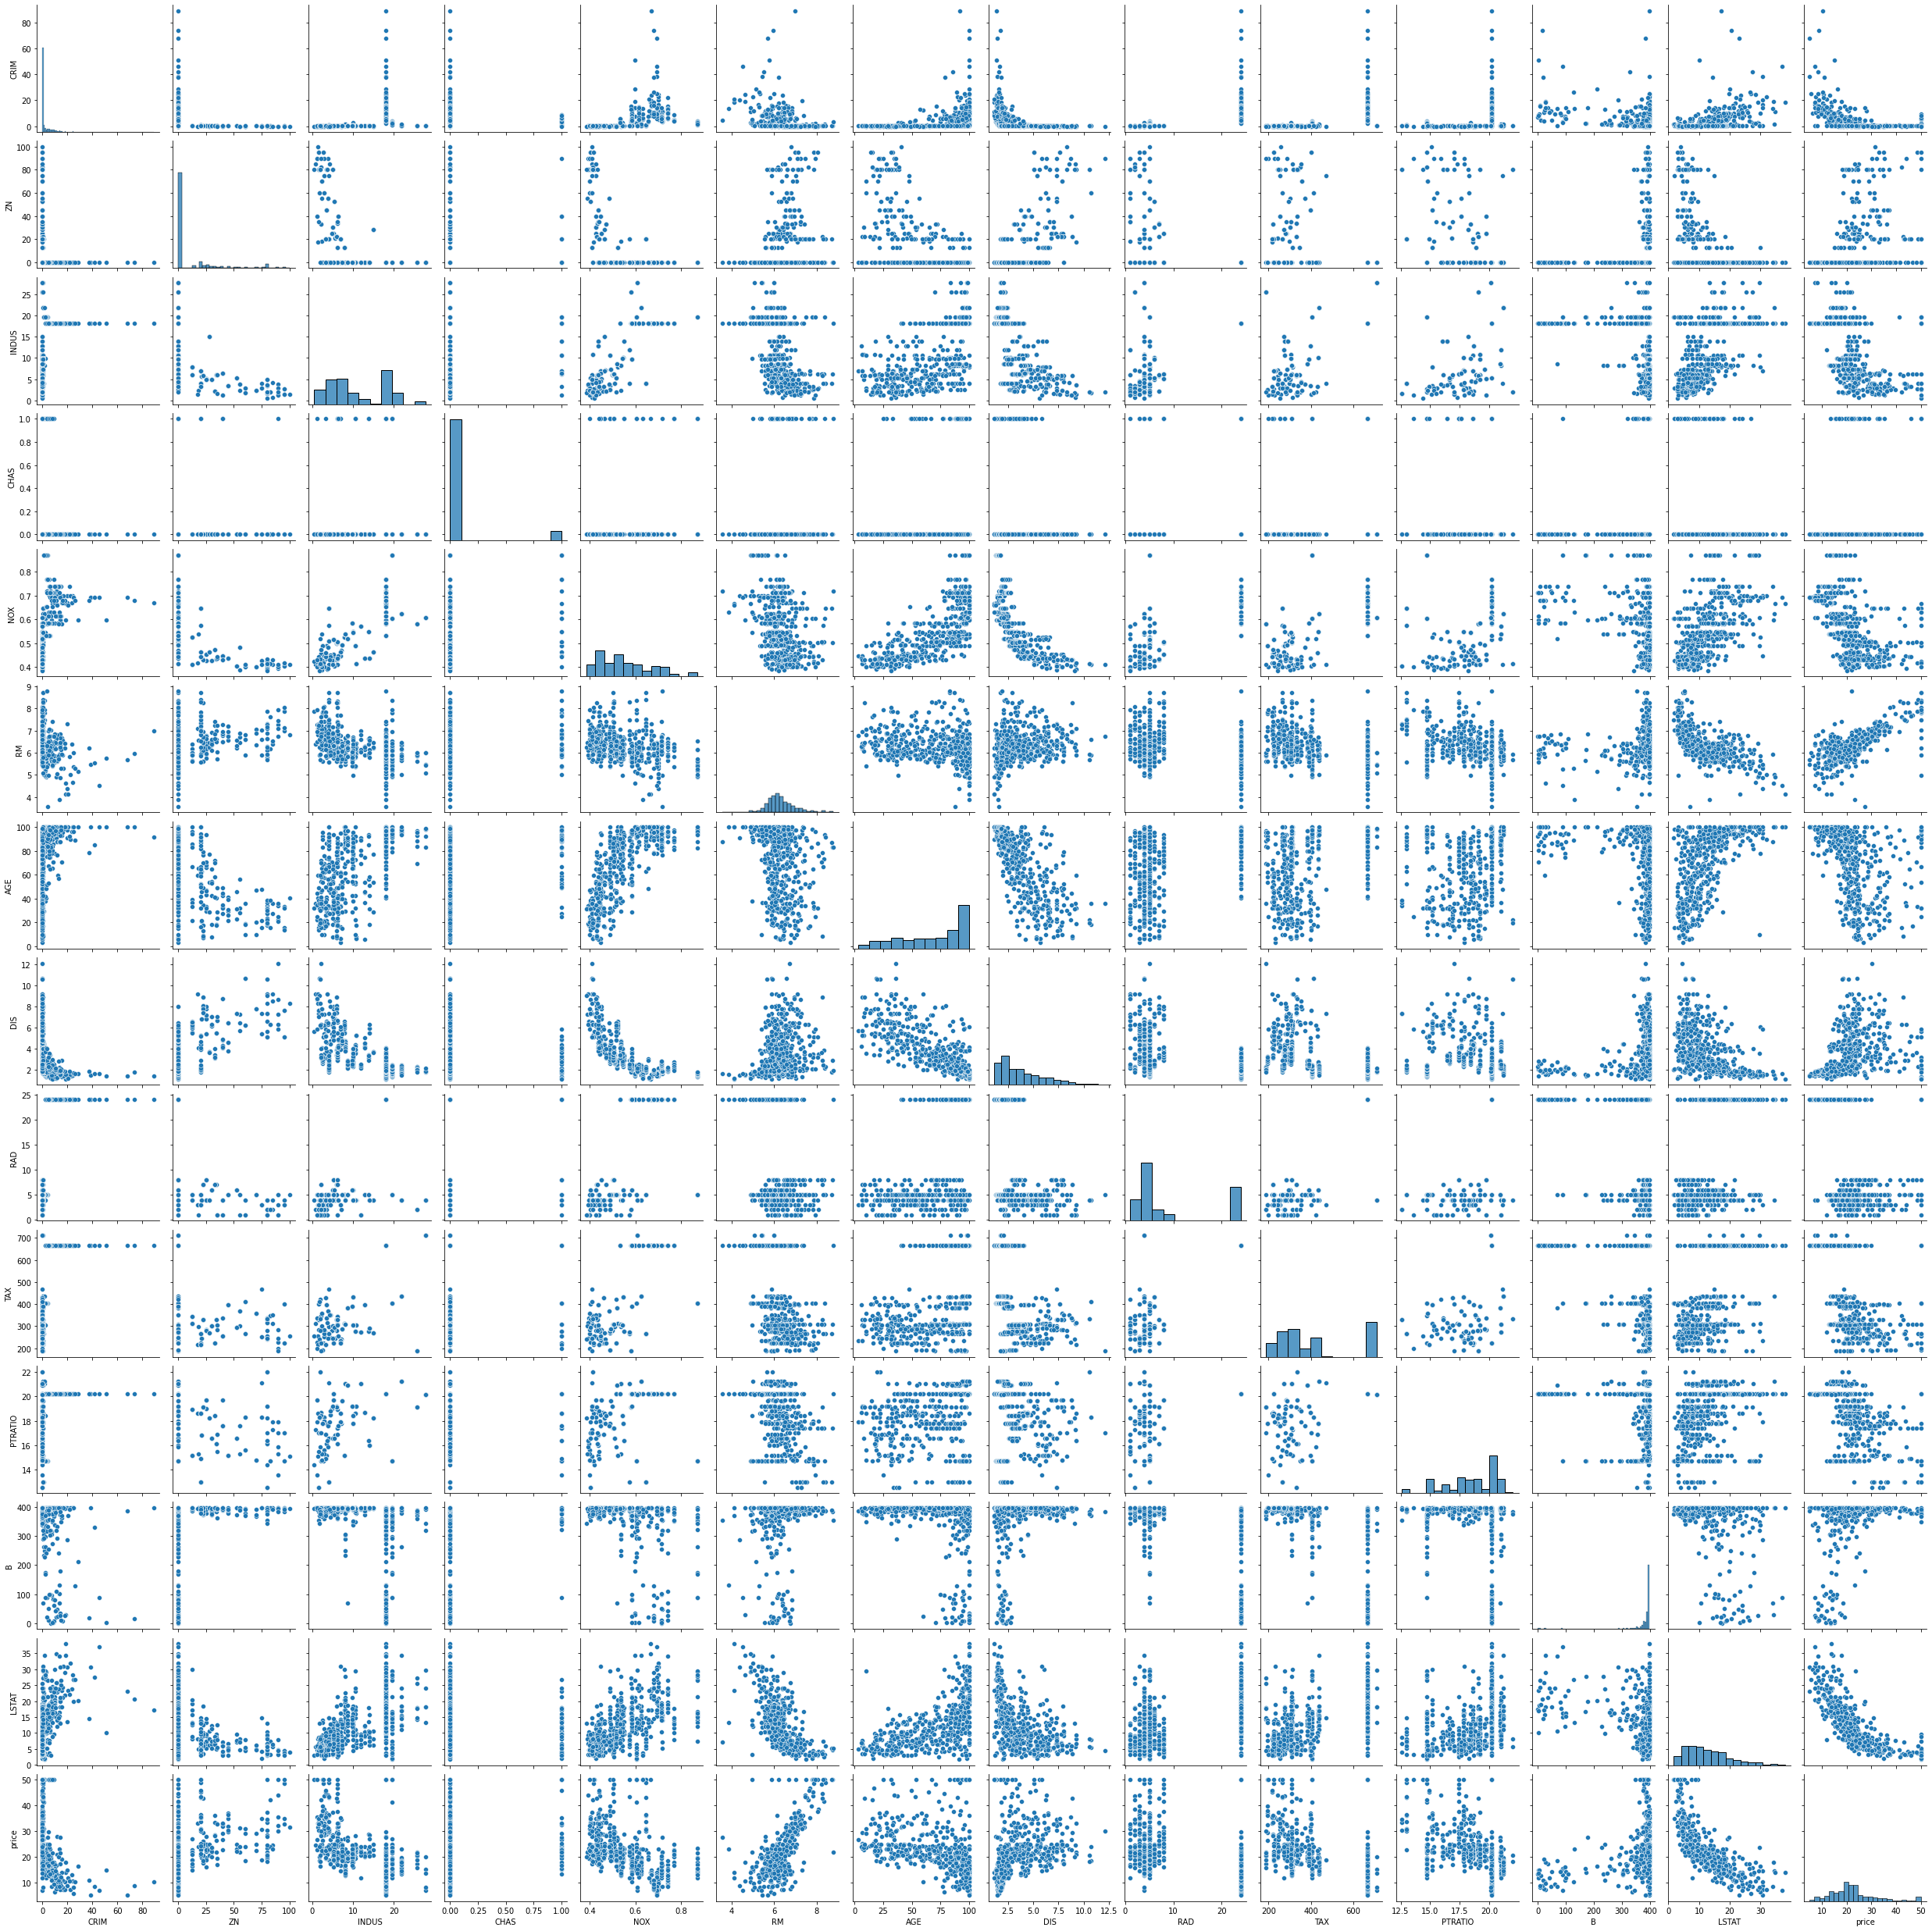

In [19]:
pairplot(df)

## Correlation matrix and heatmap to visually check for multicollinearity

In [20]:
corr = df[:-1].corr()

In [21]:
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.38,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.32,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.17
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.20,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.20,-0.75,1.00,-0.50,-0.54,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.50,1.00,0.91,0.47,-0.44,0.49,-0.38
TAX,0.58,-0.32,0.72,-0.04,0.67,-0.29,0.51,-0.54,0.91,1.00,0.46,-0.44,0.54,-0.47


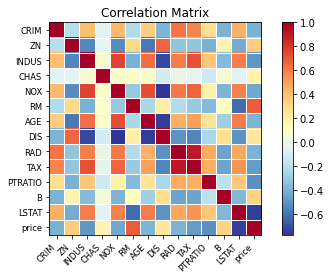

In [22]:
from statsmodels.graphics.correlation import plot_corr
fig=plot_corr(corr,xnames=corr.columns)

## Checking for Multivariate Normality

In [23]:
formula_str = df.columns[-1]+' ~ '+'+'.join(df.columns[:-1])

In [24]:
formula_str

'price ~ CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+B+LSTAT'

## Construct and fit the model. Print summary of the fitted model

In [25]:
model=sm.ols(formula=formula_str, data=df)
fitted = model.fit()

In [26]:
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 24 May 2021   Prob (F-statistic):          6.72e-135
Time:                        11:36:06   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.0

## Creating resultant dataframe

In [27]:
df_result=pd.DataFrame()

In [28]:
df_result['pvalues']=fitted.pvalues[1:]
df_result['Features']=df.columns[:-1]

In [29]:
df_result.set_index('Features',inplace=True)

In [30]:
def yes_no(b):
    if b:
        return 'Yes'
    else:
        return 'No'

In [31]:
df_result['Statistically significant?']= df_result['pvalues'].apply(yes_no)

### The p-value is the probability of obtaining test results at least as extreme as the results actually observed, under the assumption that the null hypothesis is correct.

In [32]:
df_result

,pvalues,Statistically significant?
Features,,
CRIM,0.00,Yes
ZN,0.00,Yes
INDUS,0.74,Yes
CHAS,0.00,Yes
NOX,0.00,Yes
RM,0.00,Yes
AGE,0.96,Yes
DIS,0.00,Yes
RAD,0.00,Yes


## All the predicting variables are statisticall significant with the threshold of p-value <0.01

## Residuals vs. predicting variables plots: Residue autocorrelation


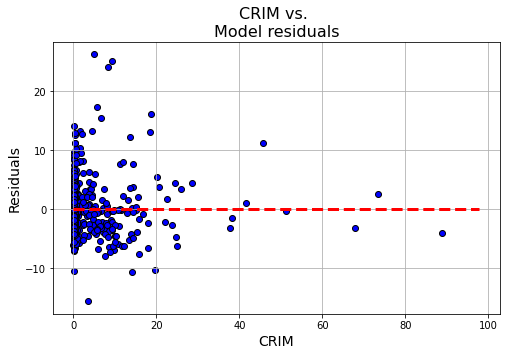

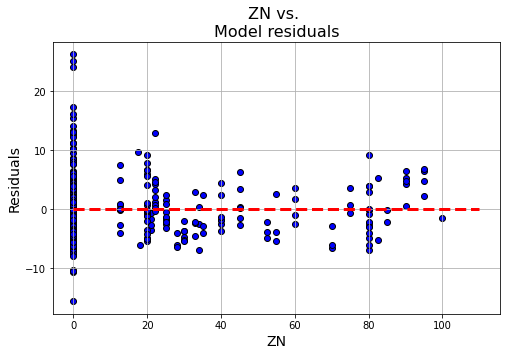

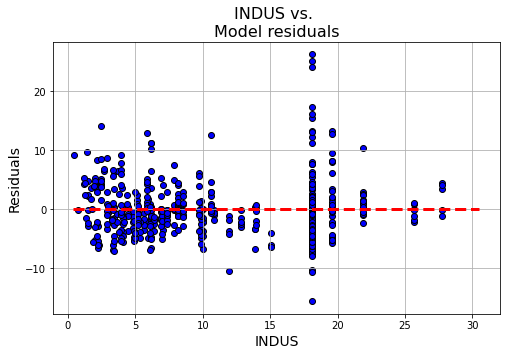

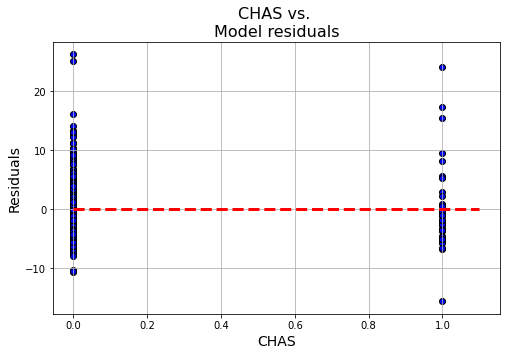

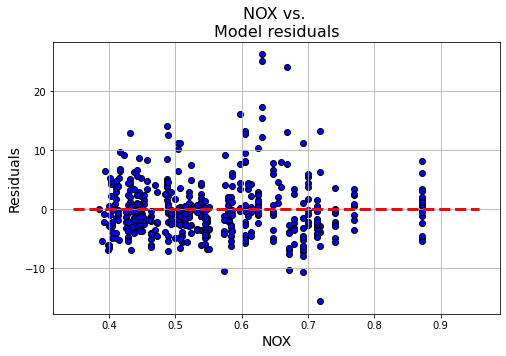

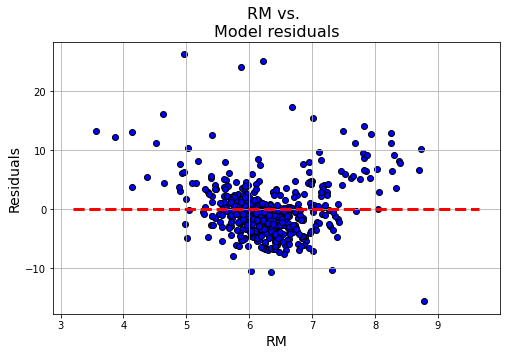

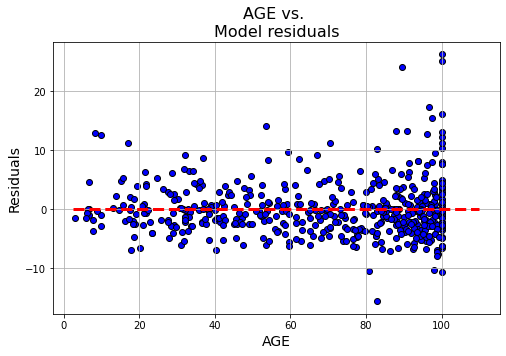

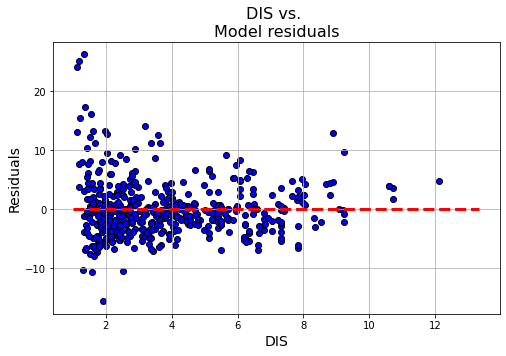

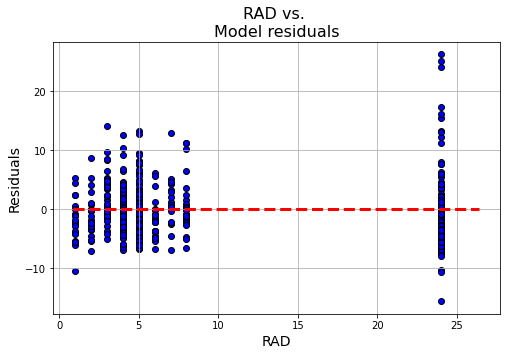

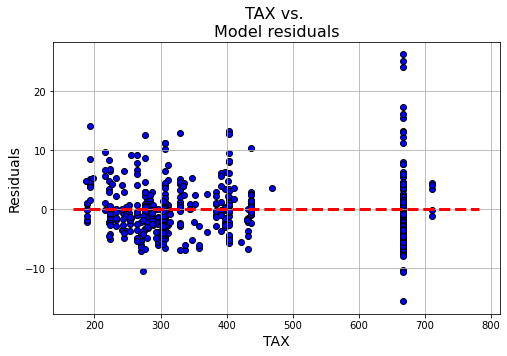

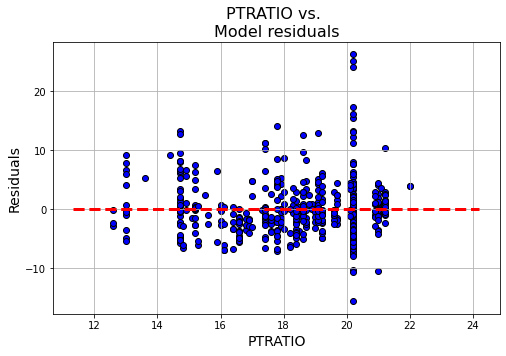

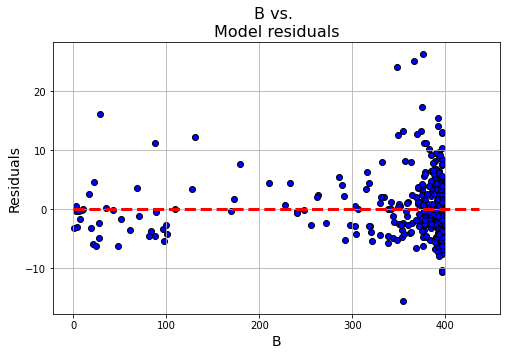

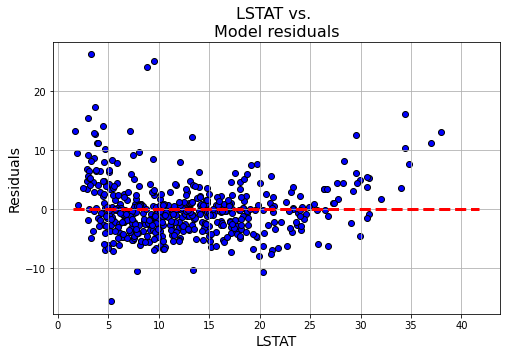

In [33]:
for c in df.columns[:-1]:
    plt.figure(figsize=(8,5))
    plt.title("{} vs. \nModel residuals".format(c),fontsize=16)
    plt.scatter(x=df[c],y=fitted.resid,color='blue',edgecolor='k')
    plt.grid(True)
    xmin=min(df[c])
    xmax = max(df[c])
    plt.hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
    plt.xlabel(c,fontsize=14)
    plt.ylabel('Residuals',fontsize=14)
    plt.show()

### Residual plots show some bit of clustering but overall the assumptions linearity and independence seem to hold because the distribution seem random around the 0 axis.

## Fitted vs residuals: Homoscedacity

### Homoscedasticity describes a situation in which the error term (that is, the “noise” or random disturbance in the relationship between the independent variables and the dependent variable) is the same across all values of the independent variables.

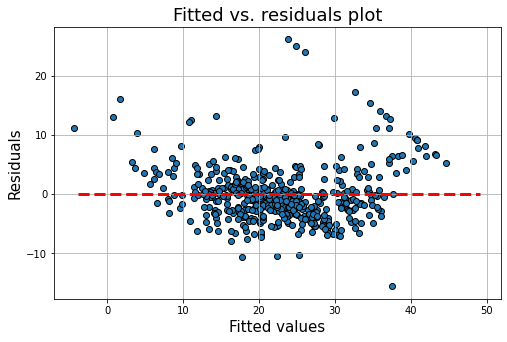

In [34]:
plt.figure(figsize=(8,5))
p=plt.scatter(x=fitted.fittedvalues,y=fitted.resid,edgecolor='k')
xmin=min(fitted.fittedvalues)
xmax = max(fitted.fittedvalues)
plt.hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
plt.xlabel("Fitted values",fontsize=15)
plt.ylabel("Residuals",fontsize=15)
plt.title("Fitted vs. residuals plot",fontsize=18)
plt.grid(True)
plt.show()

### To overcome heteroskedasticity, a possible way is to transform the response variable such as log(Y) or √Y. Also, you can use weighted least square method to tackle heteroskedasticity.

### The fitted vs. residuals plot shows violation of the constant variance assumption - Heteroscedasticity.

## Histogram of normalized residuals

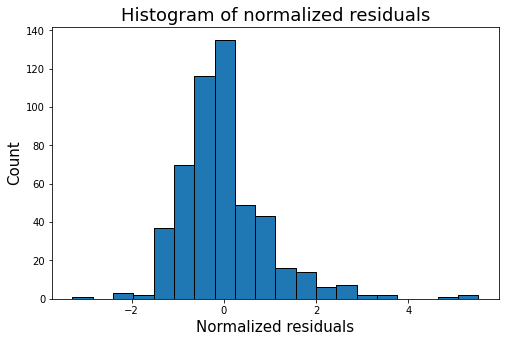

In [35]:
plt.figure(figsize=(8,5))
plt.hist(fitted.resid_pearson,bins=20,edgecolor='k')
plt.ylabel('Count',fontsize=15)
plt.xlabel('Normalized residuals',fontsize=15)
plt.title("Histogram of normalized residuals",fontsize=18)
plt.show()



## Q-Q plot of the residuals


<Figure size 576x360 with 0 Axes>

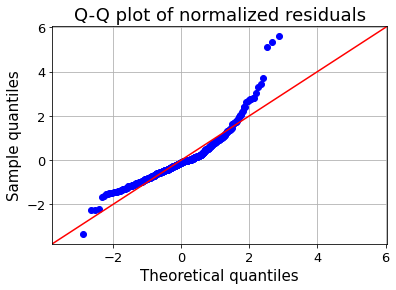

In [36]:


from statsmodels.graphics.gofplots import qqplot
plt.figure(figsize=(8,5))
fig=qqplot(fitted.resid_pearson,line='45',fit='True')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel("Theoretical quantiles",fontsize=15)
plt.ylabel("Sample quantiles",fontsize=15)
plt.title("Q-Q plot of normalized residuals",fontsize=18)
plt.grid(True)
plt.show()



### The Q-Q plot (and the histogram above) shows that the normality assumption is satisfied pretty good

## Cook's distance (checking for outliers in residuals)

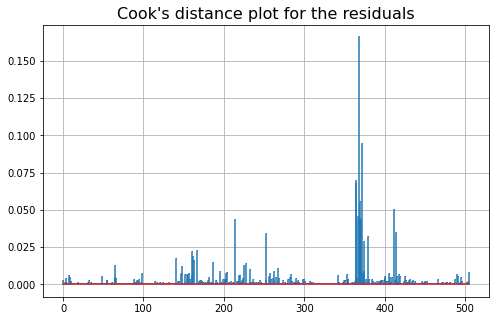

In [37]:
from statsmodels.stats.outliers_influence import OLSInfluence as influence
inf=influence(fitted)

(c, p) = inf.cooks_distance
plt.figure(figsize=(8,5))
plt.title("Cook's distance plot for the residuals",fontsize=16)
plt.stem(np.arange(len(c)), c, markerfmt=",")
plt.grid(True)
plt.show()



### There are few data points with residuals being possible outliers

## Let's start building models

In [38]:
X_train1, X_test1, Y_train1, Y_test1 =train_test_split(X1,Y1,test_size=.3,random_state =23)
regr=LazyRegressor(verbose=0,predictions=True)


In [39]:
start_time_2=time.time()
models_r,predictions_r=regr.fit(X_train1, X_test1, Y_train1, Y_test1)
end_time_2=time.time()

100%|██████████| 42/42 [00:03<00:00, 12.81it/s]


In [40]:
models_r

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.85,0.86,3.40,0.22
HistGradientBoostingRegressor,0.82,0.83,3.72,0.23
RandomForestRegressor,0.82,0.83,3.75,0.35
GradientBoostingRegressor,0.81,0.83,3.76,0.19
LGBMRegressor,0.81,0.82,3.83,0.07
XGBRegressor,0.80,0.81,3.92,0.09
BaggingRegressor,0.79,0.81,4.00,0.05
AdaBoostRegressor,0.79,0.81,4.00,0.12
KNeighborsRegressor,0.77,0.79,4.21,0.02


In [ ]:
print("\n\nThe time taken by LazyRegressor for {0} samples is {1} ms".format(len(.data),round(end_time_2-start_time_2,0)))

NameError: ignored